# PROJECT NAME : House prices : Advanced regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [4]:
data = pd.read_csv("D:\\Datascience\\datasets\\train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Missing values 

In [13]:
feature_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>1] 

for feature in feature_with_na:
    print(feature, np.round(data[feature].isnull().mean(),4), "% missing value")
    

LotFrontage 0.1774 % missing value
Alley 0.9377 % missing value
MasVnrType 0.0055 % missing value
MasVnrArea 0.0055 % missing value
BsmtQual 0.0253 % missing value
BsmtCond 0.0253 % missing value
BsmtExposure 0.026 % missing value
BsmtFinType1 0.0253 % missing value
BsmtFinType2 0.026 % missing value
FireplaceQu 0.4726 % missing value
GarageType 0.0555 % missing value
GarageYrBlt 0.0555 % missing value
GarageFinish 0.0555 % missing value
GarageQual 0.0555 % missing value
GarageCond 0.0555 % missing value
PoolQC 0.9952 % missing value
Fence 0.8075 % missing value
MiscFeature 0.963 % missing value


# since they are so many missing values , we have to find the relation between missing values & salesprice

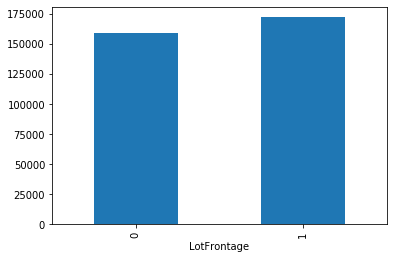

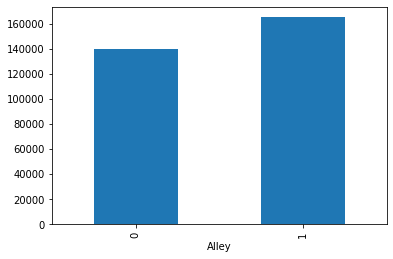

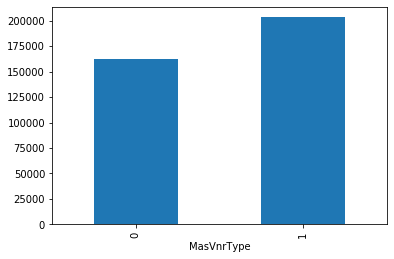

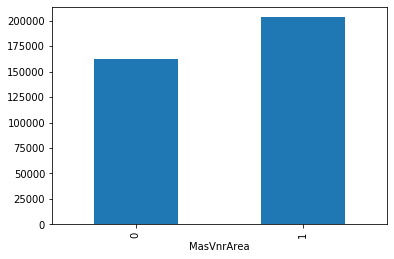

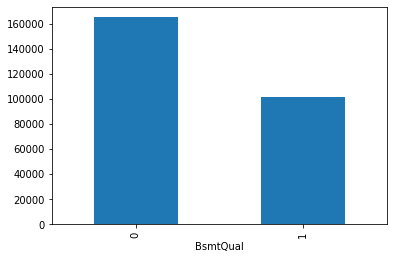

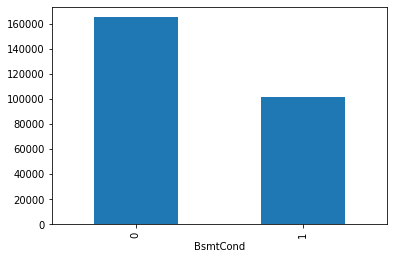

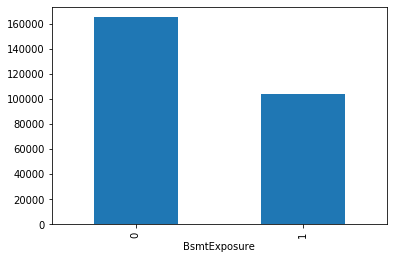

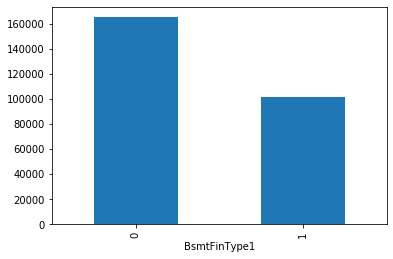

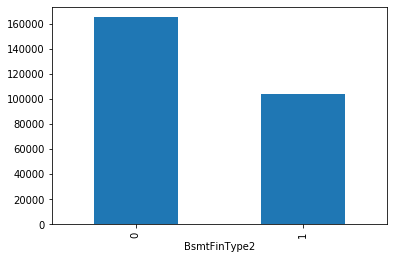

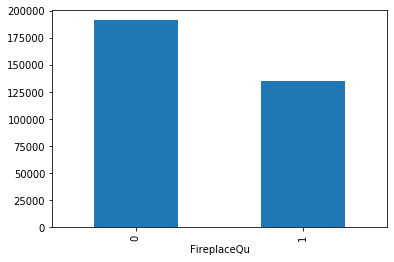

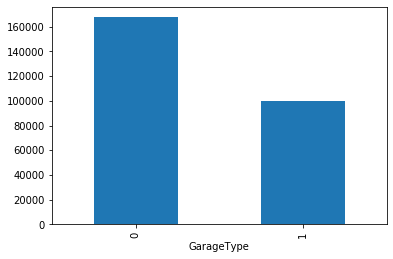

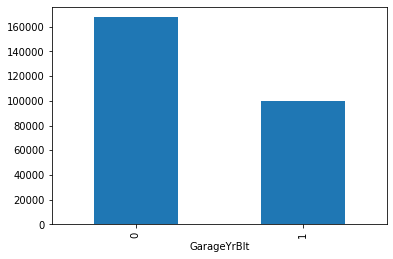

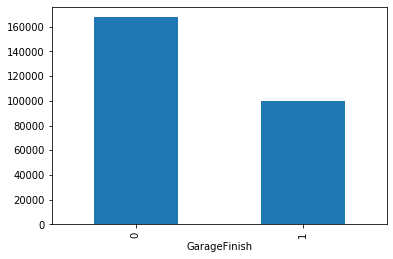

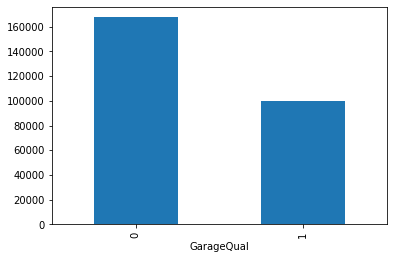

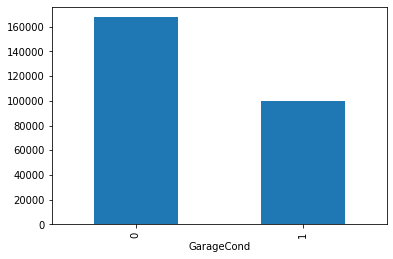

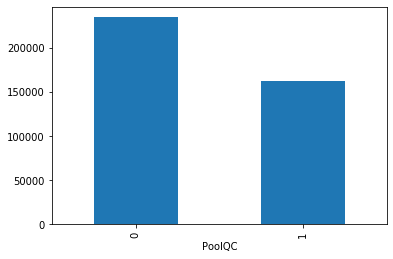

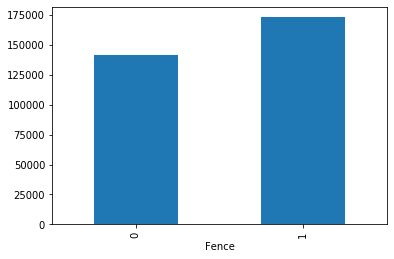

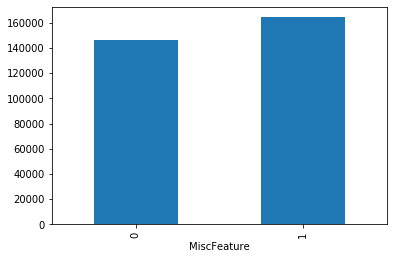

In [15]:
for feature in feature_with_na:
    dataset=data.copy()
    dataset[feature] = np.where(dataset[feature].isnull(),1,0)
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

here with the realation between the mssing values and the dependent variable is clearly visible.
so we need to replace the missing values with some meaningful that we do in feature engg

# Numerical variables

In [16]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype != "object"]
print("number of numerical variables:",len(numerical_feature))
data[numerical_feature].head()

number of numerical variables: 41


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,2,2008,208500,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,5,2007,181500,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,9,2008,223500,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,2,2006,140000,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,12,2008,250000,0,0,0


Temporal variables(eg:Datetime varible)
from the dataset we have 4 year variable. we have to extract info from the datetime variables like no of year or number of days.
one example in this specific scenerio can be difference in years between the year the house was sold. 

In [17]:
year_feature = [feature for feature in numerical_feature if "Yr" in feature or "Year" in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan']

In [25]:
for feature in year_feature:
    print(feature,data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'house price v/s year sold')

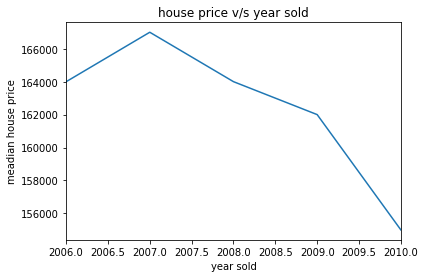

In [31]:
# we will check weather is there any relation between yearsold and and saleprice 
data.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("year sold")
plt.ylabel("meadian house price")
plt.title("house price v/s year sold")

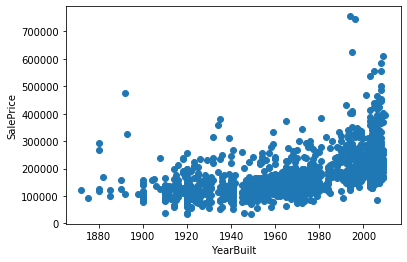

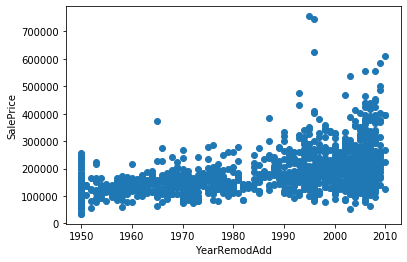

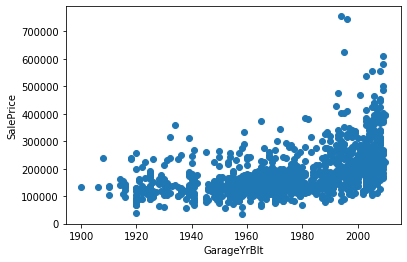

In [37]:
# here we will compare the difference between all years feature with saleprice

for feature in year_feature:
    dataset = data.copy()
    if feature!='YrSold':
        dataset[feature]=dataset["YrSold"]-data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

In [41]:
 discreate_feature = [ feature for feature in numerical_feature if len(data[feature].unique())<25 and feature not in year_feature+["id"]]
print("discreate variables count :{}".format(len(discreate_feature)))

discreate variables count :17


In [43]:
dataset[discreate_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


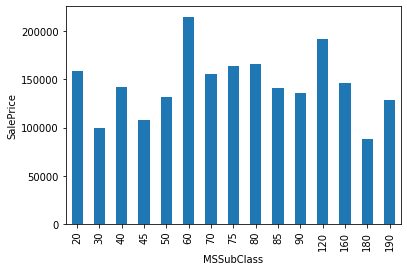

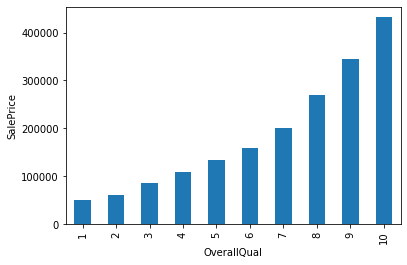

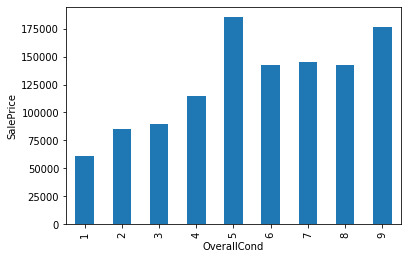

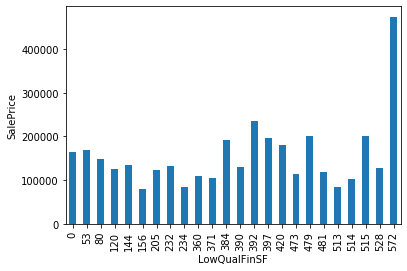

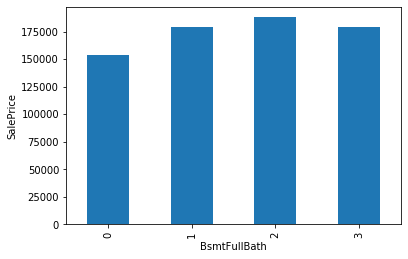

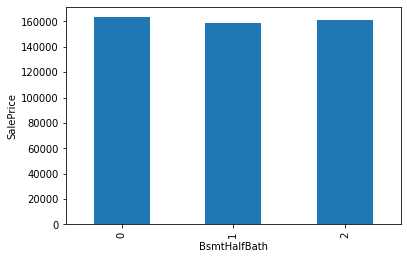

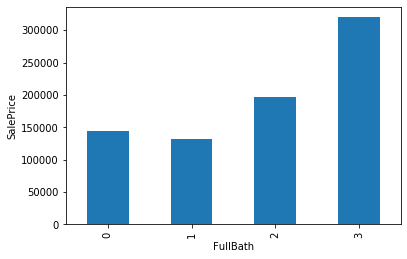

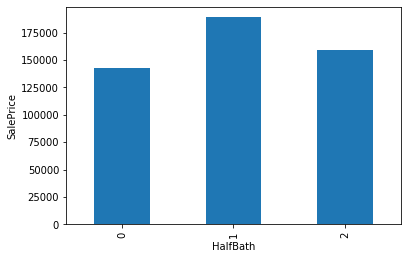

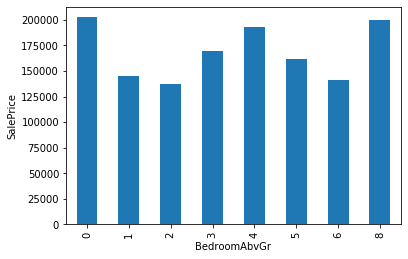

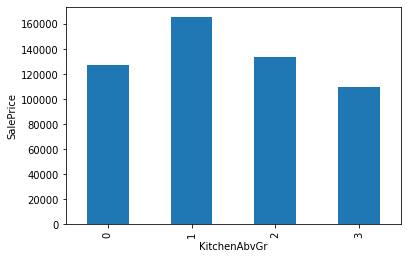

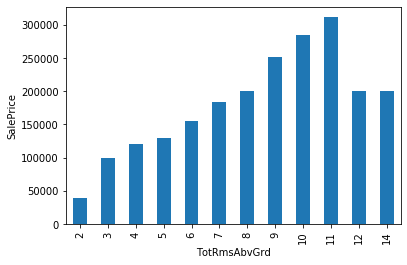

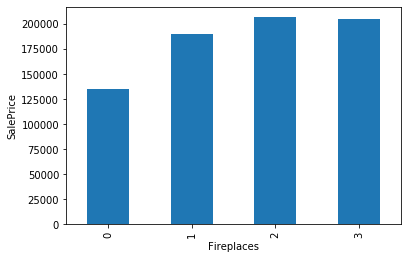

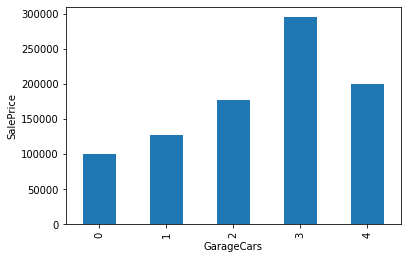

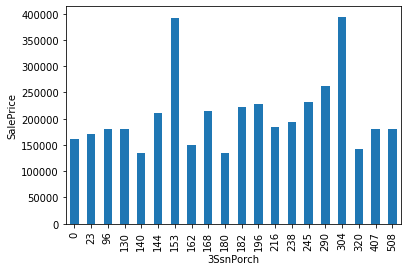

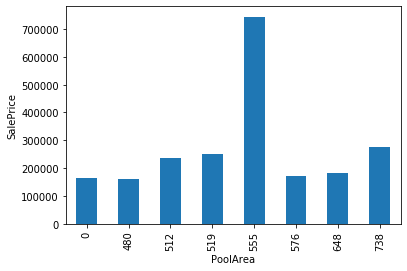

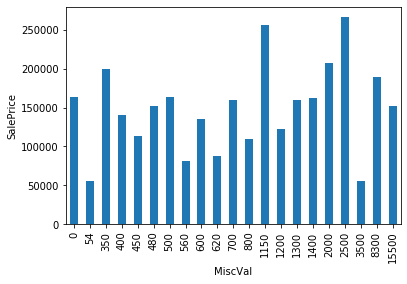

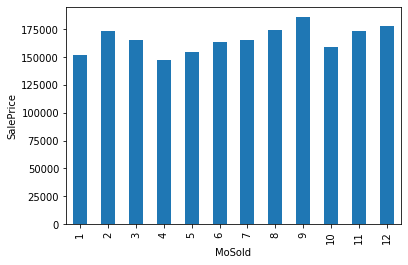

In [45]:
# lets find the realation between them and the saleprice

for feature in discreate_feature:
    dataset =data.copy()
    dataset.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()
    

# continious variable

In [46]:
continious_feature = [feature for feature in numerical_feature if feature not in discreate_feature+year_feature+["id"]]
print("totle number of continous_feature are:{}".format(len(continious_feature)))

totle number of continous_feature are:17


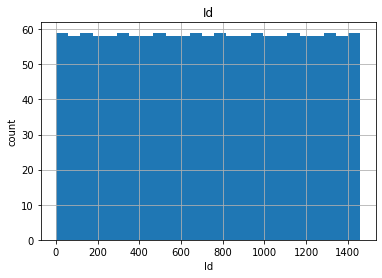

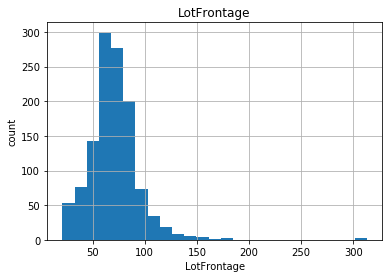

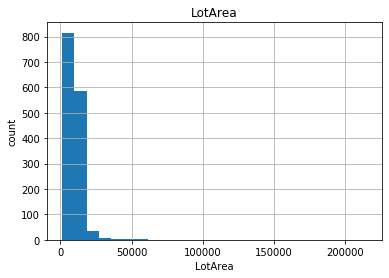

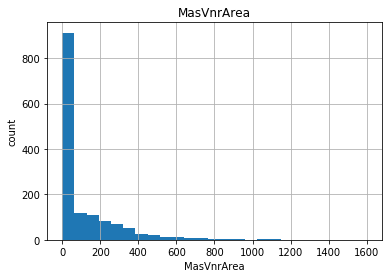

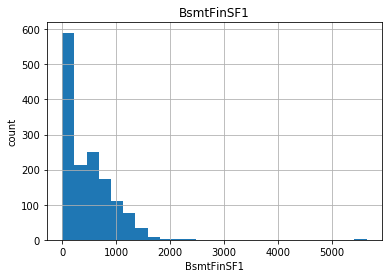

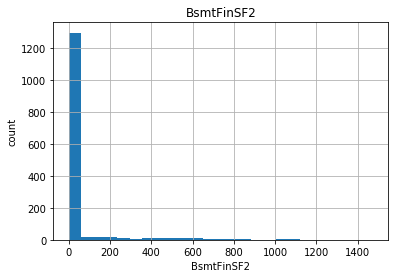

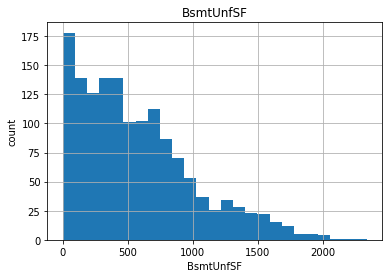

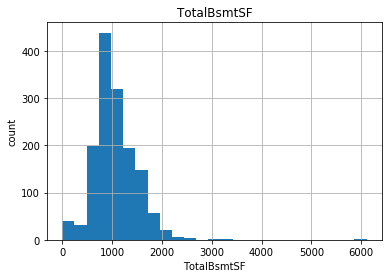

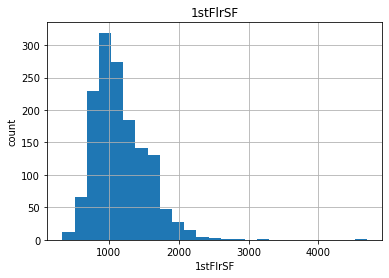

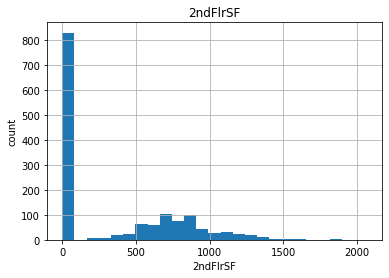

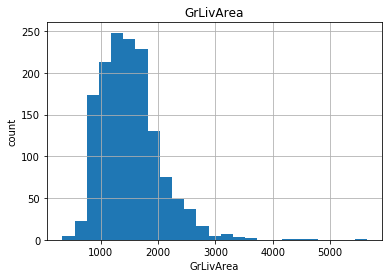

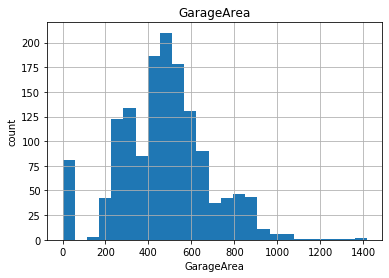

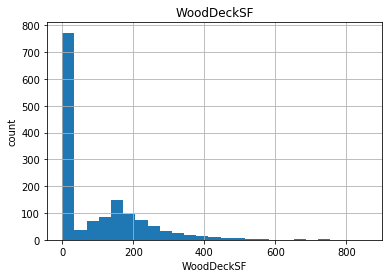

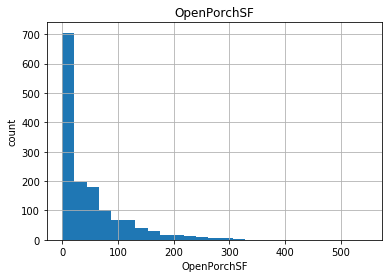

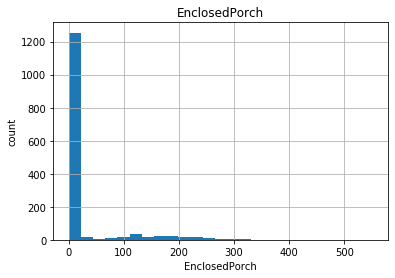

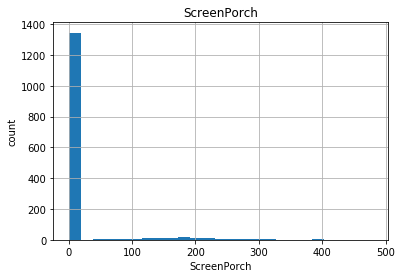

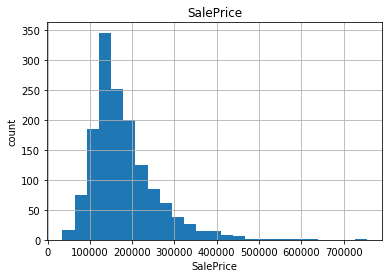

In [47]:
# lets analyse the continous variables by creating histograms to understand data

for feature in continious_feature:
    dataset=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

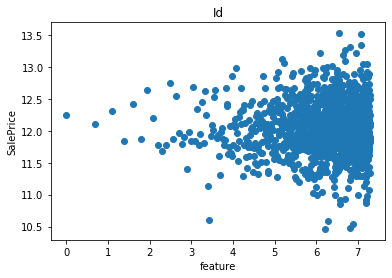

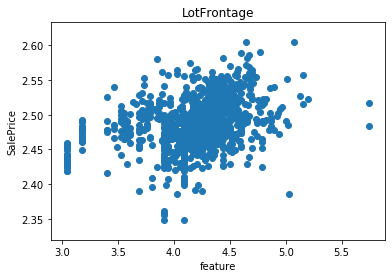

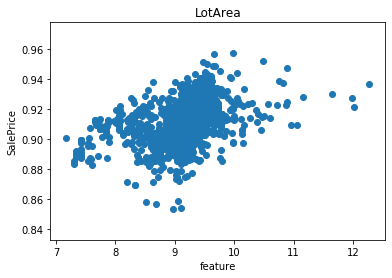

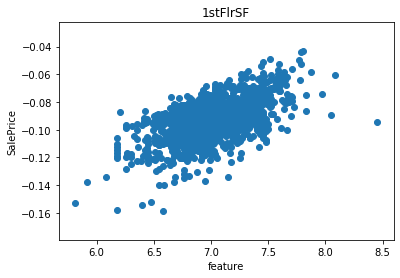

D:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


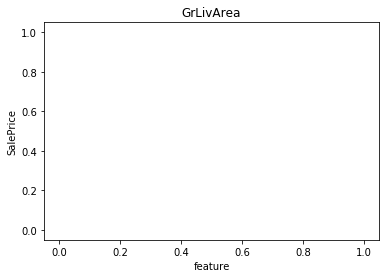

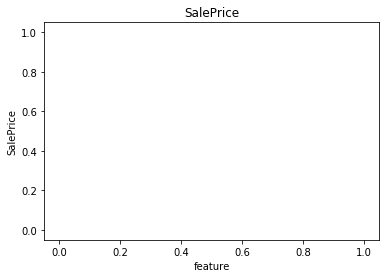

In [51]:
# we will use using the logarthemic transformation
dataset = data.copy()
for feature in continious_feature:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset["SalePrice"]=np.log(dataset["SalePrice"])
        plt.scatter(dataset[feature],dataset["SalePrice"])
        plt.xlabel('feature')
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()
        

# outliers

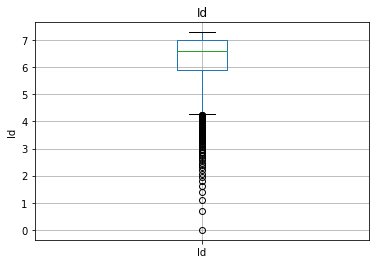

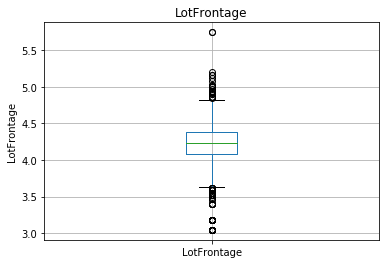

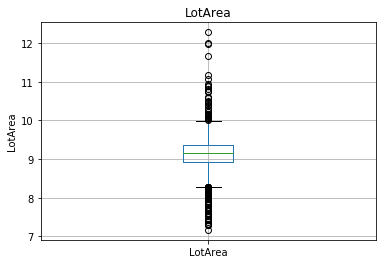

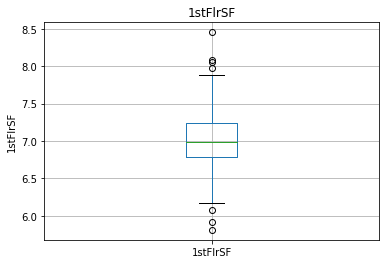

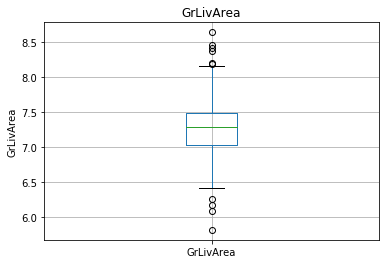

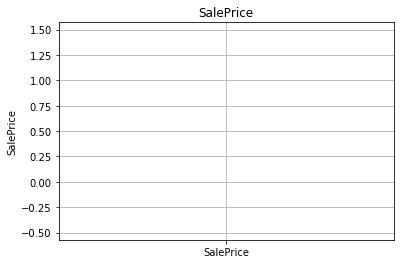

In [53]:
for feature in continious_feature:
    dataset=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

# categorical variable

In [72]:
categorical_features = [feature for feature in data.columns if data[feature].dtype=="object"]
data[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [73]:
for feature in categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

the feature is MSZoning and number of categories are 5
the feature is Street and number of categories are 2
the feature is Alley and number of categories are 3
the feature is LotShape and number of categories are 4
the feature is LandContour and number of categories are 4
the feature is Utilities and number of categories are 2
the feature is LotConfig and number of categories are 5
the feature is LandSlope and number of categories are 3
the feature is Neighborhood and number of categories are 25
the feature is Condition1 and number of categories are 9
the feature is Condition2 and number of categories are 8
the feature is BldgType and number of categories are 5
the feature is HouseStyle and number of categories are 8
the feature is RoofStyle and number of categories are 6
the feature is RoofMatl and number of categories are 8
the feature is Exterior1st and number of categories are 15
the feature is Exterior2nd and number of categories are 16
the feature is MasVnrType and number of cate

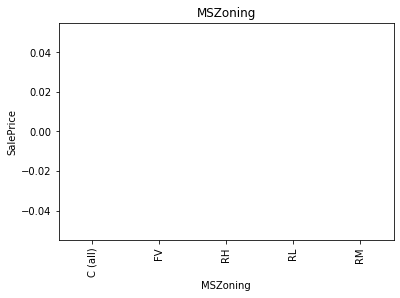

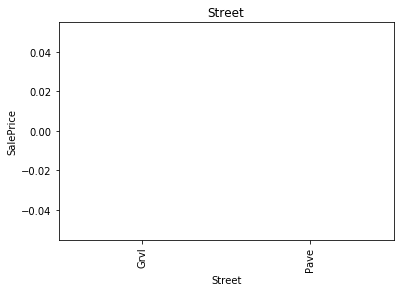

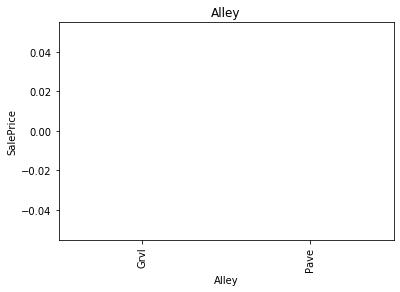

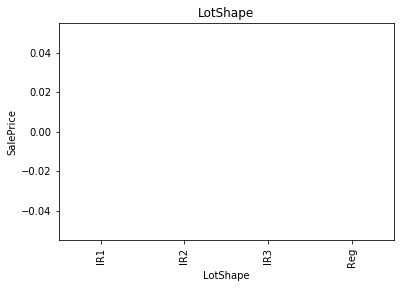

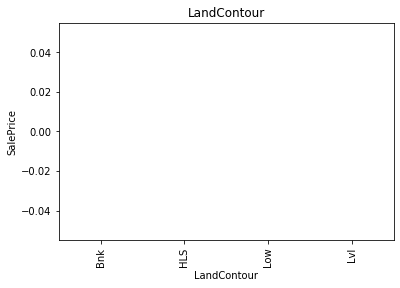

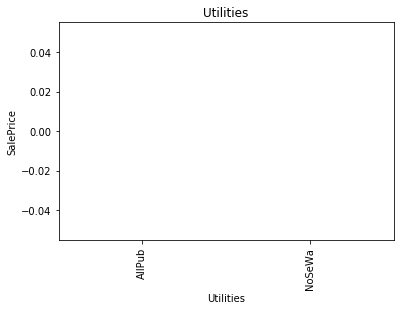

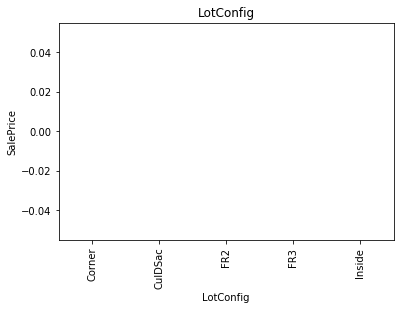

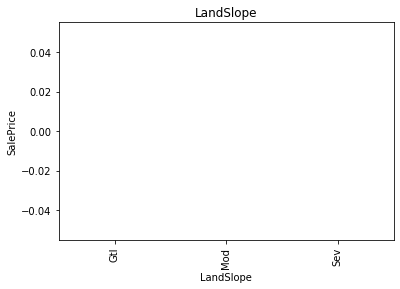

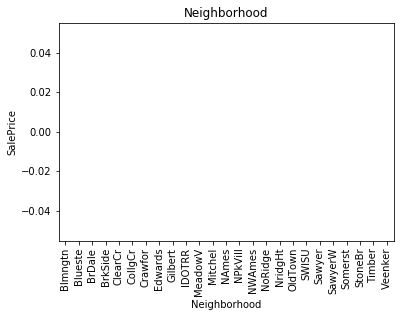

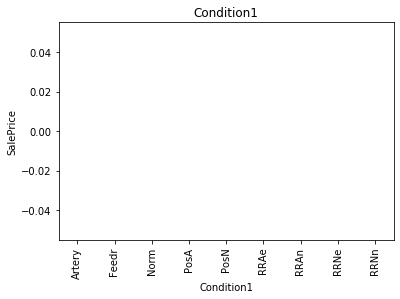

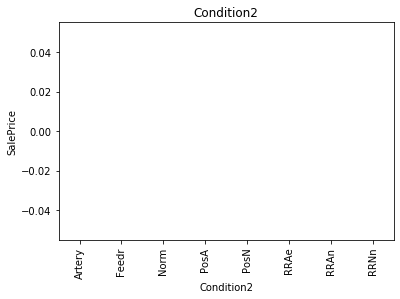

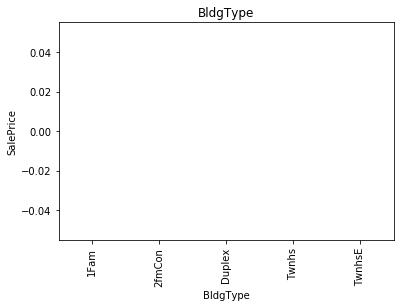

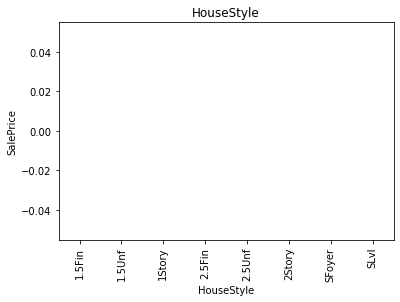

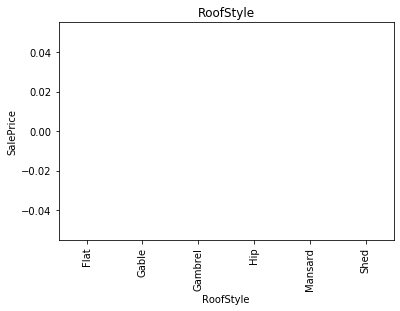

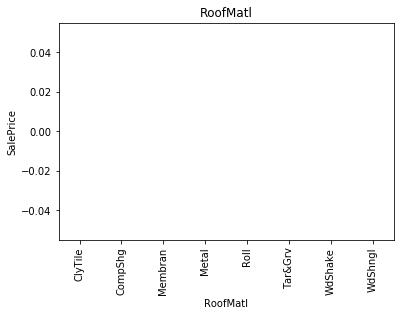

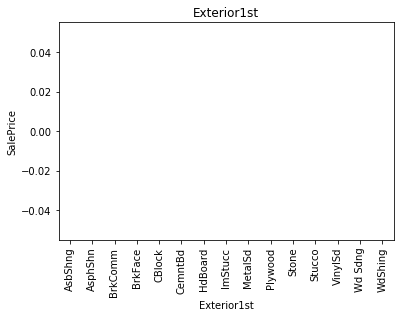

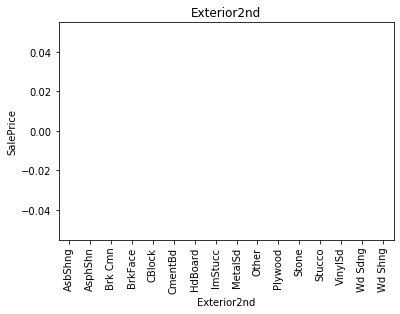

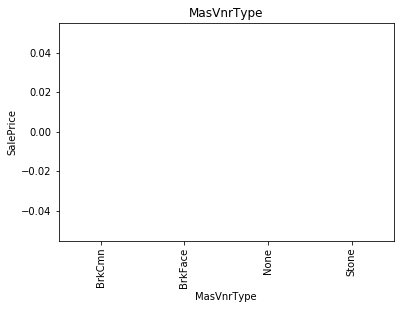

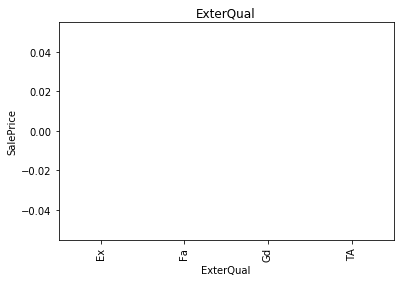

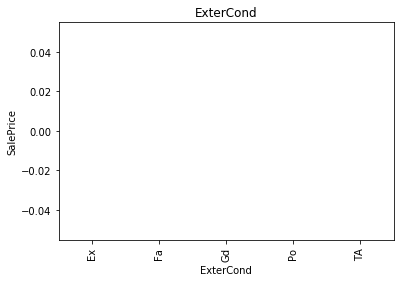

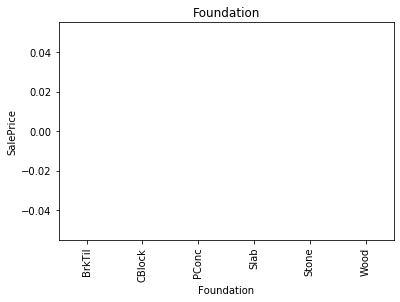

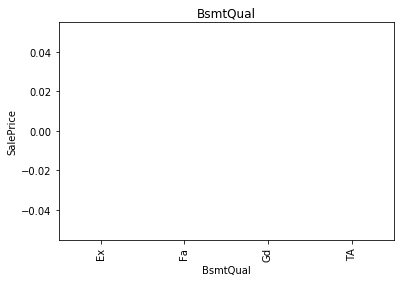

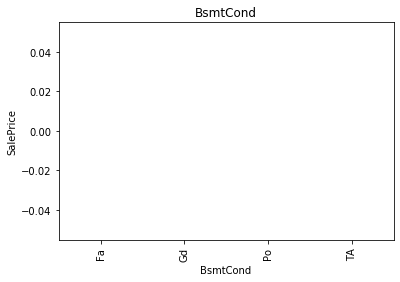

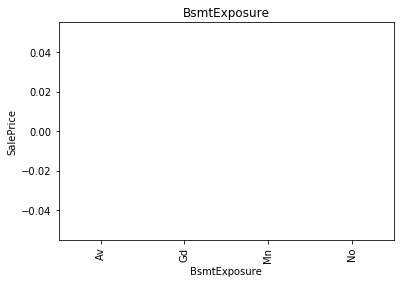

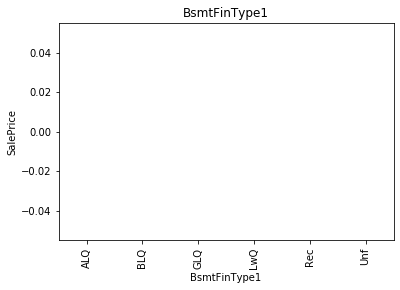

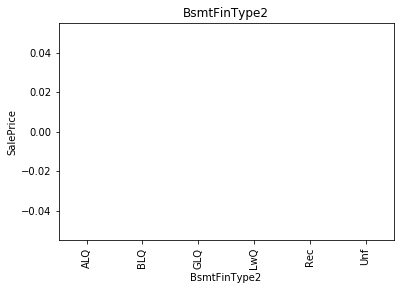

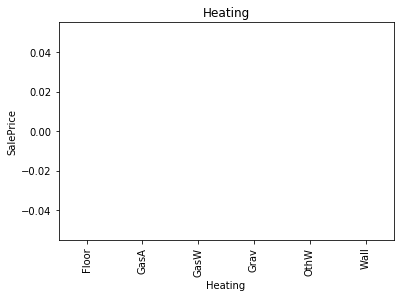

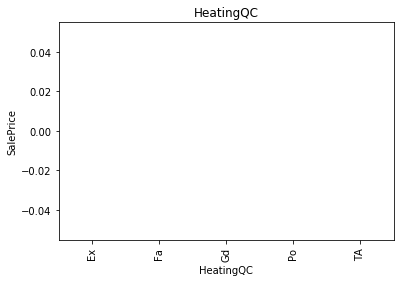

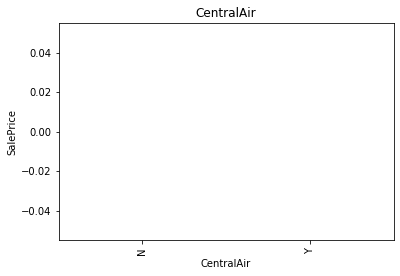

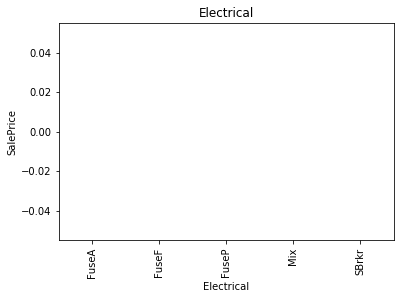

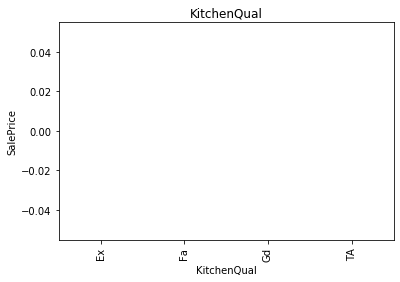

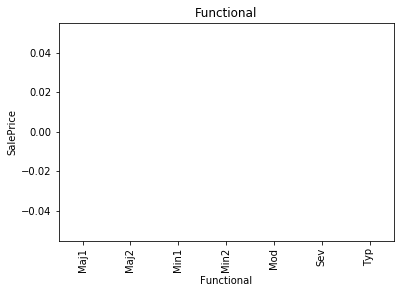

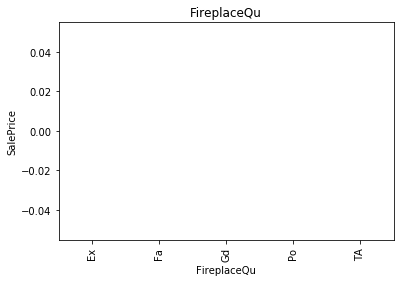

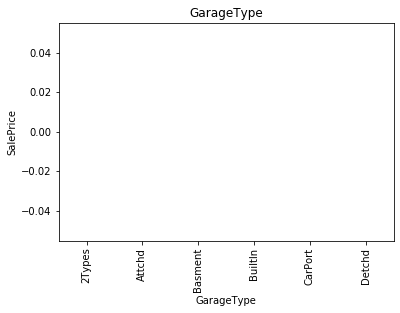

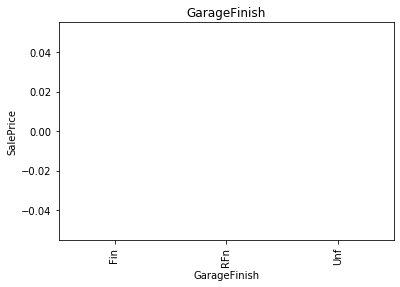

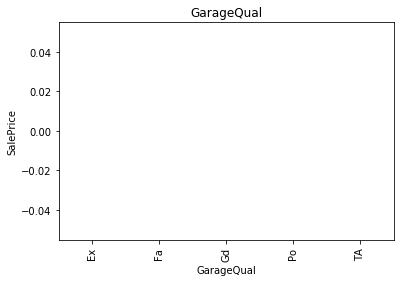

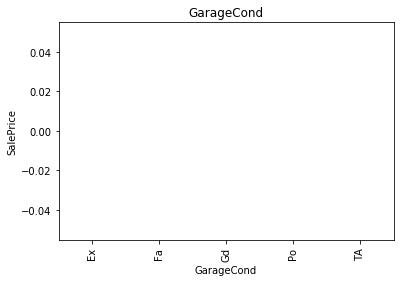

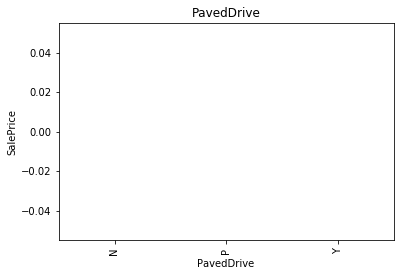

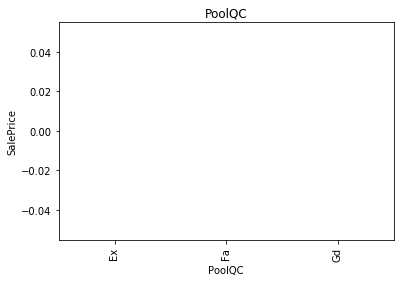

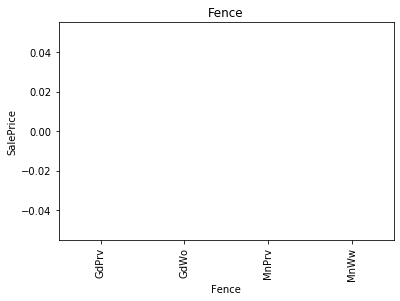

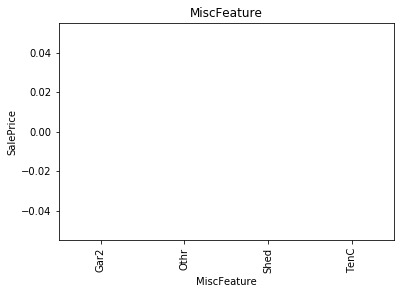

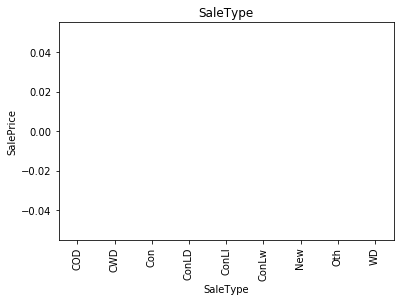

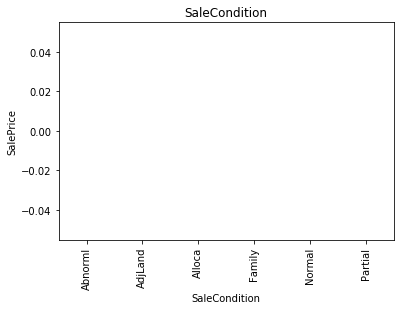

In [75]:
# we will find realation between the categorical varibles and dependent feature

for feature in categorical_features:
    dataset=data.copy()
    dataset.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()


# Feature engineering 

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# from sklearn.model_selction import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(data,data["SalePrice"],test_size=0.1,random_state=0) 
# since its kaggle data we have saparate test data no need to split 

# missing values

In [7]:
feature_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtype=="object"]

for feature in feature_nan:
    print("{}:{}%missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

Alley:0.9377%missing values
MasVnrType:0.0055%missing values
BsmtQual:0.0253%missing values
BsmtCond:0.0253%missing values
BsmtExposure:0.026%missing values
BsmtFinType1:0.0253%missing values
BsmtFinType2:0.026%missing values
FireplaceQu:0.4726%missing values
GarageType:0.0555%missing values
GarageFinish:0.0555%missing values
GarageQual:0.0555%missing values
GarageCond:0.0555%missing values
PoolQC:0.9952%missing values
Fence:0.8075%missing values
MiscFeature:0.963%missing values


In [8]:
# replacing missing values with a new label
def replace_cat_feature(data,feature_nan):
    dataset=data.copy()
    dataset[feature_nan]=dataset[feature_nan].fillna("missing")
    return dataset
data=replace_cat_feature(data,feature_nan)
data[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [11]:
numerical_feature_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtype!="object"]

for feature in numerical_feature_nan:
    print("{}:{}% missing value".format(feature,np.around(data[feature].isnull().mean(),4)))

LotFrontage:0.1774% missing value
MasVnrArea:0.0055% missing value
GarageYrBlt:0.0555% missing value


In [12]:
# replacing the numerical missing values

for feature in numerical_feature_nan:
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    data[feature+"nan"]=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
data[numerical_feature_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,250000,0,0,0


In [18]:
# temperal variable(date time variables)
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan']

In [19]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    data[feature]=data['YrSold']-data[feature]

In [20]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,250000,0,0,0


In [21]:
data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


# Numerical variables
since the numerical values are skewed we will perform log normal disturbution

In [23]:
import numpy as np
num_feature=["LotFrontage","LotArea","1stFlrSF","GrLivArea","SalePrice"]

for feature in num_feature:
    data[feature]=np.log(data[feature])

In [24]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,1.428968,2.201872,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,2.505338,0,0,0
1,2,20,RL,1.477511,2.215885,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,2.493950,0,0,0
2,3,60,RL,1.439718,2.233034,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,2.510994,0,0,0
3,4,70,RL,1.409607,2.215315,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,2.472277,0,0,0
4,5,60,RL,1.488584,2.258133,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,2.520050,0,0,0


In [27]:
categorical_feature=[feature for feature in data.columns if data[feature].dtype=="object"]
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [29]:
for feature in categorical_feature:
    temp=data.groupby(feature)["SalePrice"].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],"Rare_var")

In [30]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,1.428968,2.201872,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,2.505338,0,0,0
1,2,20,RL,1.477511,2.215885,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,2.493950,0,0,0
2,3,60,RL,1.439718,2.233034,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,2.510994,0,0,0
3,4,70,RL,1.409607,2.215315,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,2.472277,0,0,0
4,5,60,RL,1.488584,2.258133,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,2.520050,0,0,0


In [32]:
data.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,1.428968,2.201872,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,2.505338,0,0,0
1,2,20,RL,1.477511,2.215885,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,2.493950,0,0,0
2,3,60,RL,1.439718,2.233034,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,2.510994,0,0,0
3,4,70,RL,1.409607,2.215315,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,2.472277,0,0,0
4,5,60,RL,1.488584,2.258133,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,2.520050,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,1.443172,2.217742,Pave,missing,IR2,Lvl,AllPub,...,Shed,480,4,2009,WD,Normal,2.495526,1,0,0
96,97,20,RL,1.471717,2.223152,Pave,missing,IR1,Lvl,AllPub,...,missing,0,8,2006,WD,Normal,2.507461,0,0,0
97,98,20,RL,1.456394,2.229847,Pave,missing,Reg,HLS,AllPub,...,missing,0,5,2007,WD,Normal,2.438775,0,0,0
98,99,30,RL,1.491251,2.226887,Pave,missing,Reg,Lvl,AllPub,...,Shed,400,5,2010,COD,Abnorml,2.427154,0,0,0


# Feature scaling